# Feature selection
Forward step-wise selection of the best features to use, following a greedy approach.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.base import clone

In [2]:
path = "features/"
filenames = ["symptoms.npz", "ks_level_2.npz", "community_count.npz", "community_size.npz", "ks_level_1.npz", "betweennes.npz"]
sample_percentage = 0.05
parameters = {'C': 0.001, 'solver': 'liblinear'}
model = LogisticRegression(**parameters)

In [3]:
# Perform logistic regression and compute accuracy
def train_and_evaluate(X_train, X_test, y_train, y_test):
    modelz = clone(model)
    modelz.fit(X_train, y_train)
    y_pred = modelz.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

#Main script

#load features from .npz files
labels = np.load(path + filenames[0])['y']
num_samples = int(labels.shape[0] * sample_percentage)
sampled_indices = np.random.choice(labels.shape[0], num_samples, replace=False)
labels = labels[sampled_indices]
features = []
for filename in filenames:
    file_path = path + filename
    data = np.load(file_path)
    feature_matrix = data['X']
    feature_matrix = feature_matrix[sampled_indices, :]
    features.append(feature_matrix)

# Perform feature selection and record accuracies
num_features = len(features)
remaining_features = list(range(num_features))
already_used_features = []
accuracies = []

# Initial null model with the first feature
X_train, X_test, y_train, y_test = train_test_split(features[0], labels, test_size=0.2, random_state=42)
null_model_accuracy = train_and_evaluate(X_train, X_test, y_train, y_test)
accuracies.append(null_model_accuracy)
remaining_features.pop(0)
already_used_features.append(0)

# Feature selection iterations
while remaining_features:
    best_accuracy = 0
    best_feature = None

    for feature_index in remaining_features:
        current_features = already_used_features + [feature_index]
        X = np.hstack([features[i] for i in current_features])

        X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
        accuracy = train_and_evaluate(X_train, X_test, y_train, y_test)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature = feature_index

    # Update lists
    accuracies.append(best_accuracy*100)
    remaining_features.remove(best_feature)
    already_used_features.append(best_feature)

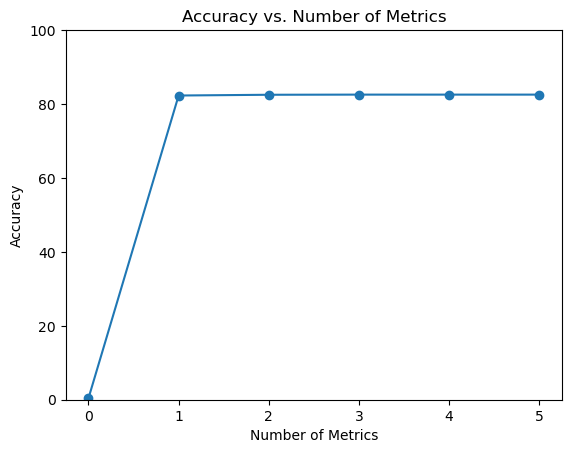

In [4]:
# Plot accuracies
plt.plot(range(len(accuracies)), accuracies, marker='o')
plt.xlabel('Number of Metrics')
plt.ylabel('Accuracy')
plt.ylim(0, 100)
plt.title('Accuracy vs. Number of Metrics')
plt.show()

In [5]:
accuracies

[0.3757085020242915,
 82.3076923076923,
 82.51012145748989,
 82.5506072874494,
 82.5506072874494,
 82.5506072874494]